In [2]:
#import
import numpy as np
import matplotlib.pyplot as plt
import ot

# for 3d plot
from mpl_toolkits.mplot3d import Axes3D  # noqa
from matplotlib.collections import PolyCollection

# Clustering based on barycenters

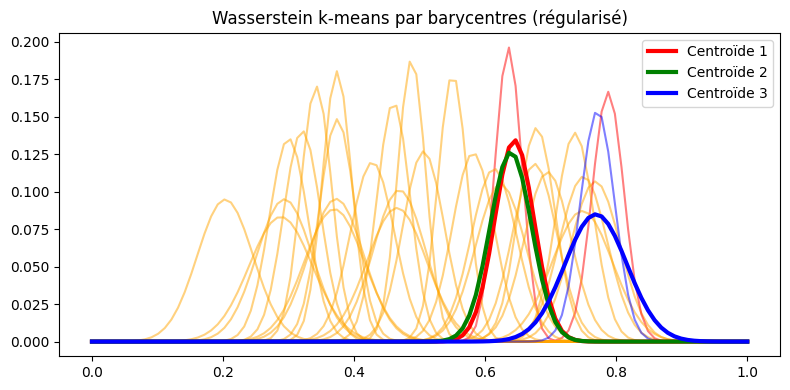

In [8]:
# parameters

n_distributions = 30 # nombre de probas
n_support = 100 # taille du support des probas
k = 3
reg = 1e-1
n_iter = 20 # nombre d'itérations du k-means

# génération des données
x = np.linspace(0, 1, n_support)  # support commun

def random_gaussian_on_grid():
    m = np.random.uniform(0.2, 0.8)
    s = np.random.uniform(0.02, 0.05)
    density = np.exp(-0.5 * ((x - m) / s)**2)
    return density / density.sum()

distributions = np.array([random_gaussian_on_grid() for _ in range(n_distributions)])

# initialisation des centroides 
indices = np.random.choice(n_distributions, k, replace=False)
centroids = distributions[indices].copy()

# algo
for t in range(n_iter):
    # Affectation : chaque distribution au centroïde le plus proche
    assignments = []
    for i in range(n_distributions):
        dists = [ot.sinkhorn(distributions[i], c, ot.dist(x[:, None], x[:, None]), reg) for c in centroids]
        assignments.append(np.argmin(dists))
    assignments = np.array(assignments)

    # Mise à jour : recalcul des centroïdes comme barycentres de chaque cluster
    new_centroids = []
    for j in range(k):
        members = distributions[assignments == j]
        if len(members) == 0:
            # éviter cluster vide
            new_centroids.append(random_gaussian_on_grid())
        else:
            new_c = ot.bregman.barycenter(members.T, ot.dist(x[:, None], x[:, None]), reg)
            new_centroids.append(new_c)
    centroids = np.array(new_centroids)

# -------------------------
# AFFICHAGE
# -------------------------

colors = ['red', 'green', 'blue', 'purple', 'orange']
plt.figure(figsize=(8, 4))
for i in range(n_distributions):
    plt.plot(x, distributions[i], color=colors[assignments[i] % len(colors)], alpha=0.5)

for j in range(k):
    plt.plot(x, centroids[j], color=colors[j % len(colors)], linewidth=3, label=f'Centroïde {j+1}')

plt.title("Wasserstein k-means par barycentres (régularisé)")
plt.legend()
plt.tight_layout()
plt.show()
